Load dataset

In [2]:
import pandas as pd
df = pd.read_json('./dataset/News_Category_Dataset_v2.json', lines=True)

df.head()

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26


In [3]:
df.shape

(200853, 6)

In [4]:
len(df.category.unique())

41

In [5]:
from matplotlib import pyplot as plt

plt.figure(figsize=(15,8));
df['category'].value_counts().plot.bar();

Penulis hanya akan mengambil data dari 5 kategori yang menurut penulis paling penting

In [6]:
df_first = df.loc[(df['category'] == 'POLITICS') | (df['category'] == 'BUSINESS') | (df['category'] == 'SPORTS') | (df['category'] == 'CRIME') | (df['category'] == 'FOOD & DRINK')]
df_first

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
13,POLITICS,Trump's Crackdown On Immigrant Parents Puts Mo...,Elise Foley and Roque Planas,https://www.huffingtonpost.com/entry/immigrant...,Last month a Health and Human Services officia...,2018-05-26
14,POLITICS,'Trump's Son Should Be Concerned': FBI Obtaine...,"Michael Isikoff, Yahoo News",https://www.huffingtonpost.com/entry/fbi-wiret...,The wiretaps feature conversations between Ale...,2018-05-26
15,POLITICS,Edward Snowden: There's No One Trump Loves Mor...,Mary Papenfuss,https://www.huffingtonpost.com/entry/edward-sn...,"But don't count on Robert Mueller to nail him,...",2018-05-26
16,POLITICS,Booyah: Obama Photographer Hilariously Trolls ...,Mary Papenfuss,https://www.huffingtonpost.com/entry/obama-pho...,Just a peeping minute.,2018-05-26
...,...,...,...,...,...,...
200837,BUSINESS,Positive Customer Experience: What's the Retur...,"Ernan Roman, Contributor\nPresident",https://www.huffingtonpost.com/entry/positive-...,"""Analysts at Adobe combined historical purchas...",2012-01-28
200849,SPORTS,Maria Sharapova Stunned By Victoria Azarenka I...,,https://www.huffingtonpost.com/entry/maria-sha...,"Afterward, Azarenka, more effusive with the pr...",2012-01-28
200850,SPORTS,"Giants Over Patriots, Jets Over Colts Among M...",,https://www.huffingtonpost.com/entry/super-bow...,"Leading up to Super Bowl XLVI, the most talked...",2012-01-28
200851,SPORTS,Aldon Smith Arrested: 49ers Linebacker Busted ...,,https://www.huffingtonpost.com/entry/aldon-smi...,CORRECTION: An earlier version of this story i...,2012-01-28


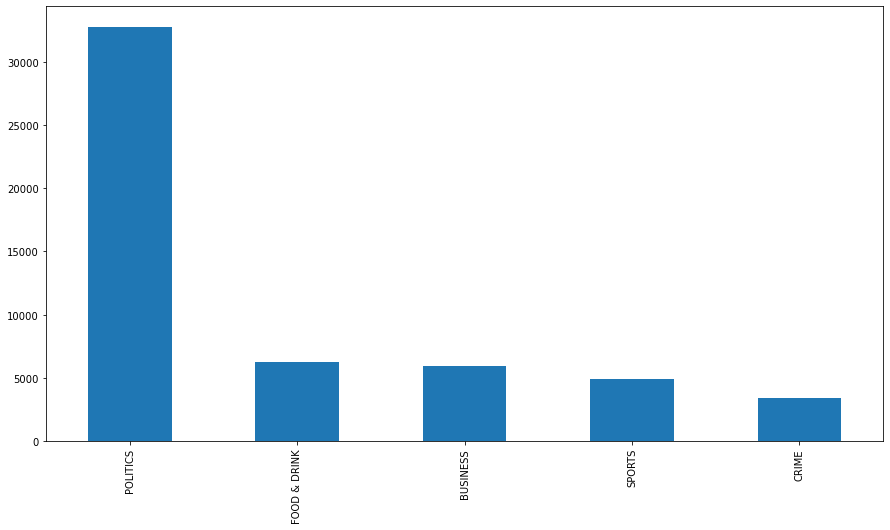

In [7]:
plt.figure(figsize=(15,8));
df_first['category'].value_counts().plot.bar();

Berdasarkan grafik di atas, didapatkan dataset yang tidak seimbang. Penulis akan mencoba untuk melakukan sampling pada data kategori "POLITICS" agar data sedikit labih seimbang.

In [8]:
df_first = df_first.drop(df_first[df_first['category'] == 'POLITICS'].sample(frac=.8).index)

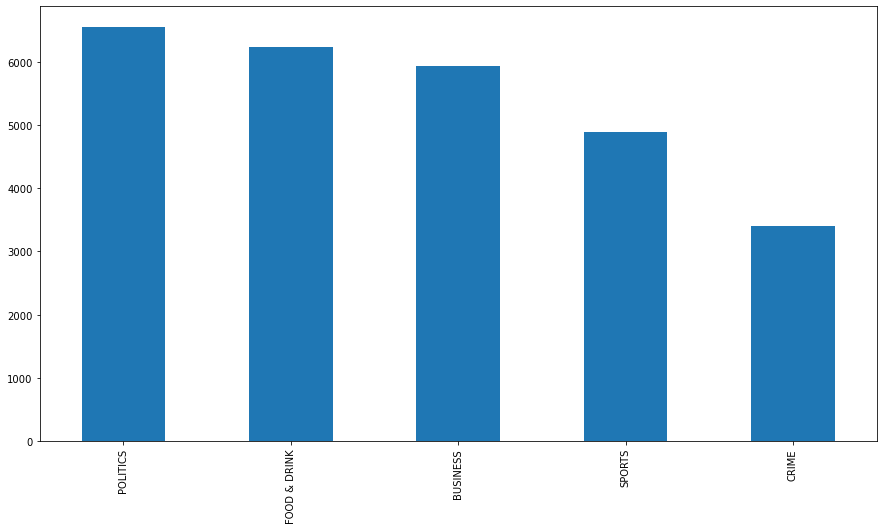

In [9]:
plt.figure(figsize=(15,8));
df_first['category'].value_counts().plot.bar();

In [10]:
df_second = df_first.drop(columns=['authors', 'link', 'date'])

In [11]:
df_second.shape

(27000, 3)

In [12]:
category = pd.get_dummies(df_second.category)
df_third = pd.concat([df_second, category], axis=1)
df_third = df_third.drop(columns='category')
df_third

,headline,short_description,BUSINESS,CRIME,FOOD & DRINK,POLITICS,SPORTS
0,There Were 2 Mass Shootings In Texas Last Week...,She left her husband. He killed their children...,0,1,0,0,0
30,"Jack Johnson Was Pardoned, But Taboo Sex Is St...",A new law to fight sex trafficking targets som...,0,0,0,1,0
32,Rachel Dolezal Faces Felony Charges For Welfar...,"State prosecutors say almost $84,000 had been ...",0,1,0,0,0
40,"Man Faces Charges After Pulling Knife, Stun Gu...","“We thought we were going to die,"" one of the ...",0,1,0,0,0
42,2 People Injured In Indiana School Shooting,"A male student, believed to be the suspect, ha...",0,1,0,0,0
...,...,...,...,...,...,...,...
200837,Positive Customer Experience: What's the Retur...,"""Analysts at Adobe combined historical purchas...",1,0,0,0,0
200849,Maria Sharapova Stunned By Victoria Azarenka I...,"Afterward, Azarenka, more effusive with the pr...",0,0,0,0,1
200850,"Giants Over Patriots, Jets Over Colts Among M...","Leading up to Super Bowl XLVI, the most talked...",0,0,0,0,1
200851,Aldon Smith Arrested: 49ers Linebacker Busted ...,CORRECTION: An earlier version of this story i...,0,0,0,0,1


In [13]:
headline = df_third['short_description'].values + ' ' + df_third['headline'].values
label = df_third.drop(['short_description', 'headline'], axis=1).values

In [14]:
from sklearn.model_selection import train_test_split
headline_train, headline_test, label_train, label_test = train_test_split(headline, label, test_size=0.2, shuffle=True)

Import Libraries

In [15]:
max_len = 256

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(lower=True, char_level=False)
tokenizer.fit_on_texts(headline_train) 
tokenizer.fit_on_texts(headline_test)
	 
sekuens_train = tokenizer.texts_to_sequences(headline_train)
sekuens_test = tokenizer.texts_to_sequences(headline_test)
	 
padded_train = pad_sequences(sekuens_train, padding='post', maxlen=max_len) 
padded_test = pad_sequences(sekuens_test, padding='post', maxlen=max_len)

word_to_index = tokenizer.word_index

In [16]:
vocab_size =  len(word_to_index)
oov_tok = "<OOV>"
embedding_dim = 200

In [17]:
def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath, encoding='utf-8') as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix

In [19]:
import numpy as np

embedding_dim = 200
embedding_matrix = create_embedding_matrix('./dataset/glove.6B.200d.txt',tokenizer.word_index, embedding_dim)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, GlobalMaxPool1D, Conv1D

# Inisisasi model sekuensial
model = Sequential()

# membuat embedding layer
model.add(Embedding(vocab_size + 1, embedding_dim, weights=[embedding_matrix], input_length=max_len, trainable=False))

# inisiasi 1D Convolutional layer
model.add(Conv1D(128, 5, activation='relu'))

# inisiasi pooling layer
model.add(GlobalMaxPool1D())

# inisiasi hidden dense layer
model.add(Dense(10, activation='relu'))

# Inisisasi output layer
model.add(Dense(units=5, activation='softmax'))

# compile model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# lihat summary model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 256, 200)          7881600   
_________________________________________________________________
conv1d (Conv1D)              (None, 252, 128)          128128    
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                1290      
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 55        
Total params: 8,011,073
Trainable params: 129,473
Non-trainable params: 7,881,600
_________________________________________________________________


In [21]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', patience=5)

num_epochs = 20
history = model.fit(padded_train, label_train, epochs=num_epochs, 
	                    validation_data=(padded_test, label_test), verbose=2, callbacks=[es])

Epoch 1/20
675/675 - 64s - loss: 0.6738 - accuracy: 0.7529 - val_loss: 0.3910 - val_accuracy: 0.8622
Epoch 2/20
675/675 - 57s - loss: 0.2770 - accuracy: 0.9091 - val_loss: 0.3631 - val_accuracy: 0.8793
Epoch 3/20
675/675 - 58s - loss: 0.1577 - accuracy: 0.9531 - val_loss: 0.3846 - val_accuracy: 0.8707
Epoch 4/20
675/675 - 60s - loss: 0.0795 - accuracy: 0.9796 - val_loss: 0.4253 - val_accuracy: 0.8735
Epoch 5/20
675/675 - 79s - loss: 0.0328 - accuracy: 0.9953 - val_loss: 0.4840 - val_accuracy: 0.8700
Epoch 6/20
675/675 - 69s - loss: 0.0121 - accuracy: 0.9992 - val_loss: 0.4958 - val_accuracy: 0.8706
Epoch 7/20
675/675 - 65s - loss: 0.0064 - accuracy: 0.9995 - val_loss: 0.5313 - val_accuracy: 0.8743


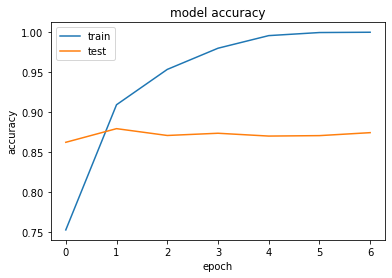

In [22]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

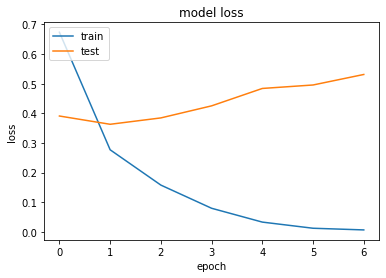

In [23]:
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()